# SMAIL AGHILAS

# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [2]:
import zipfile

zip_file_path = 'Dataset.zip'
extract_path = 'Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [10]:
import os
from PIL import Image

def remove(folder_path):
    for subfolder in os.listdir(folder_path):
        path = os.path.join(folder_path, subfolder)
        if os.path.isdir(path):
            for im_file in os.listdir(path):
                im_path = os.path.join(path, im_file)
                try:
                    # Essayer d'ouvrir le fichier image
                    img = Image.open(im_path)
                    img.verify()  
                except (IOError, SyntaxError) :
                    print(f"Suppression de {im_path}")
                    os.remove(im_path)

train_folder = 'Dataset/chest_xray/train'
test_folder = 'Dataset/chest_xray/test'
remove(train_folder)
remove(test_folder)


## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


In [11]:
import os

dataset_folder = 'Dataset'
for root, dirs, files in os.walk(dataset_folder):
    print(f'Dossier : {root}')


Dossier : Dataset
Dossier : Dataset\chest_xray
Dossier : Dataset\chest_xray\chest_xray
Dossier : Dataset\chest_xray\chest_xray\test
Dossier : Dataset\chest_xray\chest_xray\test\NORMAL
Dossier : Dataset\chest_xray\chest_xray\test\PNEUMONIA
Dossier : Dataset\chest_xray\chest_xray\train
Dossier : Dataset\chest_xray\chest_xray\train\NORMAL
Dossier : Dataset\chest_xray\chest_xray\train\PNEUMONIA
Dossier : Dataset\chest_xray\chest_xray\val
Dossier : Dataset\chest_xray\chest_xray\val\NORMAL
Dossier : Dataset\chest_xray\chest_xray\val\PNEUMONIA
Dossier : Dataset\chest_xray\test
Dossier : Dataset\chest_xray\test\NORMAL
Dossier : Dataset\chest_xray\test\PNEUMONIA
Dossier : Dataset\chest_xray\train
Dossier : Dataset\chest_xray\train\NORMAL
Dossier : Dataset\chest_xray\train\PNEUMONIA
Dossier : Dataset\chest_xray\val
Dossier : Dataset\chest_xray\val\NORMAL
Dossier : Dataset\chest_xray\val\PNEUMONIA


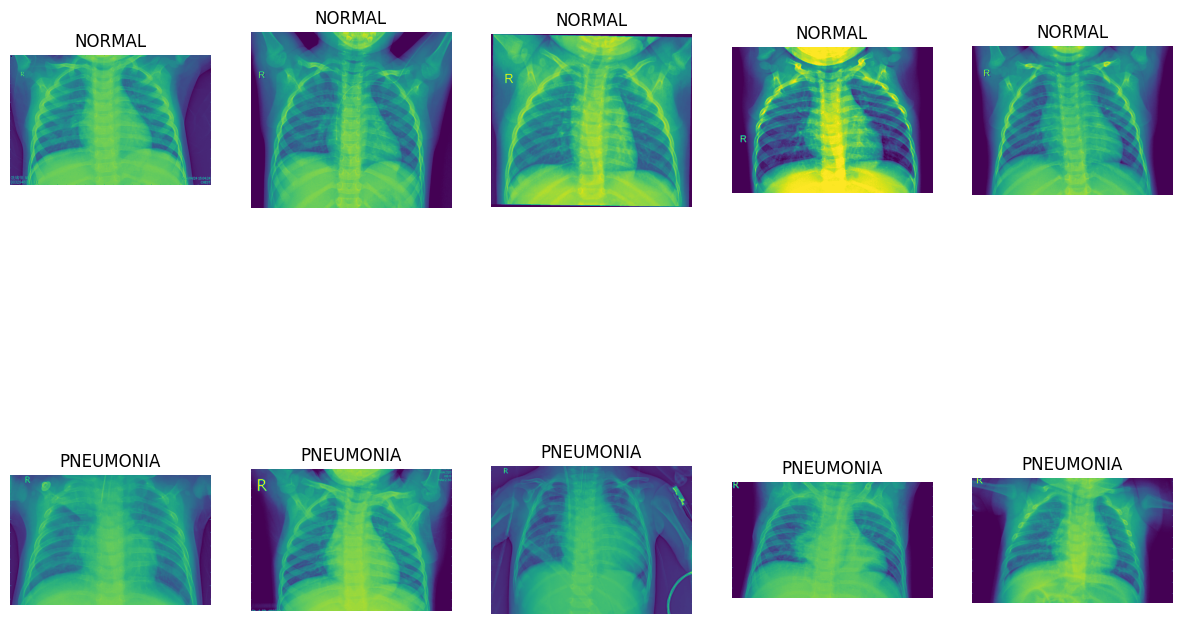

In [12]:
import os
import random
import matplotlib.pyplot as plt

def display_random_images(train_folder, num_ima=5):
    classes = os.listdir(train_folder)
    num_classes = len(classes)
    
    fig, axes = plt.subplots(num_classes, num_ima, figsize=(15, 5*num_classes))
    
    for i, class_name in enumerate(classes):
        class_folder = os.path.join(train_folder, class_name)
        image_files = os.listdir(class_folder)
        
        random_images = random.sample(image_files, num_ima)
        
        for j, random_image in enumerate(random_images):
            image_path = os.path.join(class_folder, random_image)
            image = plt.imread(image_path)
            axes[i, j].imshow(image)
            axes[i, j].set_title(class_name)
            axes[i, j].axis('off')
    
    plt.show()

train_folder = 'Dataset/chest_xray/train'
display_random_images(train_folder)


Le nombre d images dans la classe "NORMAL" dans le TRAIN est : 1341
Le nombre d images dans la classe "PNEUMONIA" dans le TRAIN est : 3875
Le nombre d images dans la classe "NORMAL" dans le TEST est : 234
Le nombre d images dans la classe "PNEUMONIA" dans le TEST est : 390


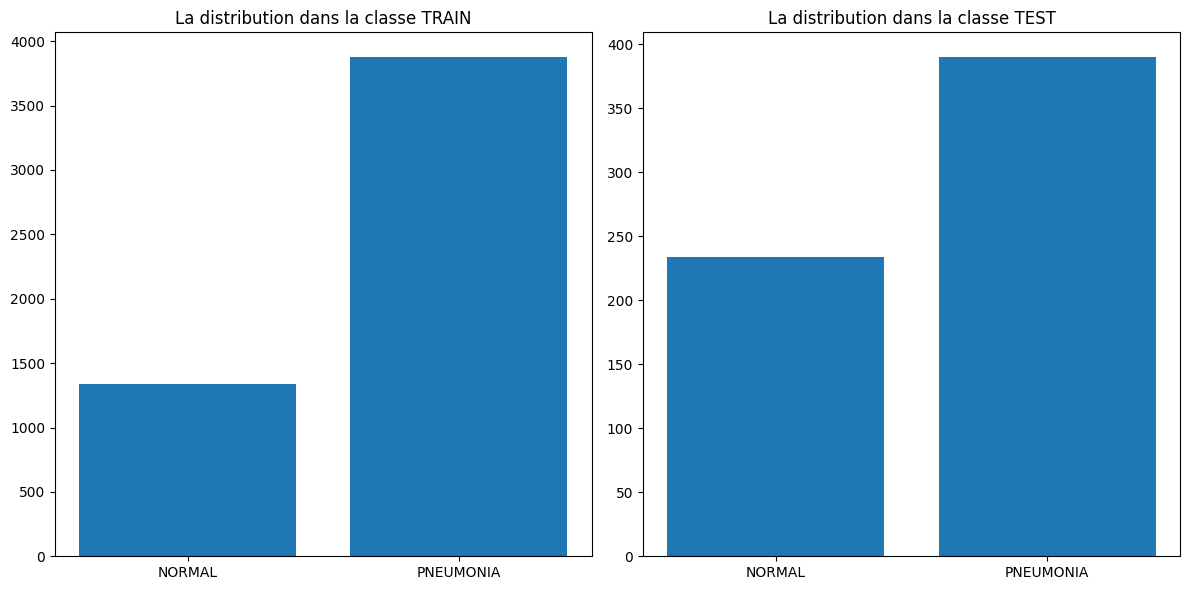

In [9]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(train_folder, test_folder):
    train_c = os.listdir(train_folder)
    test_c = os.listdir(test_folder)

    # Initialisez les compteurs pour chaque classe pour l'entraînement et le test
    train = {'NORMAL': 0, 'PNEUMONIA': 0}
    test = {'NORMAL': 0, 'PNEUMONIA': 0}

    # Calculer le nombre d'images pour chaque classe donnée et l'afficher pour savoir si c'est NORMAL ou PNEUMONIA
    for classN in train_c:
        class_f = os.path.join(train_folder, classN)
        image_f = os.listdir(class_f)

        if classN == 'NORMAL':
            train['NORMAL'] += len(image_f)
        elif classN == 'PNEUMONIA':
            train['PNEUMONIA'] += len(image_f)

        print(f'Le nombre d images dans la classe "{classN}" dans le TRAIN est : {len(image_f)}')

    for classN in test_c:
        class_f = os.path.join(test_folder, classN)
        image_f = os.listdir(class_f)

        if classN == 'NORMAL':
            test['NORMAL'] += len(image_f)
        elif classN == 'PNEUMONIA':
            test['PNEUMONIA'] += len(image_f)

        print(f'Le nombre d images dans la classe "{classN}" dans le TEST est : {len(image_f)}')


    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].bar(train.keys(), train.values())
    axes[0].set_title('La distribution dans la classe TRAIN')
    axes[1].bar(test.keys(), test.values())
    axes[1].set_title('La distribution dans la classe TEST')

    plt.tight_layout()
    plt.show()

train_folder = 'Dataset/chest_xray/train'
test_folder = 'Dataset/chest_xray/test'
plot_class_distribution(train_folder, test_folder)


## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# En ca utiliser 3 data_generator pour prétraiter les données
train_data_generator = ImageDataGenerator(rescale=1./255)
train_generator = train_data_generator.flow_from_directory(
    'Dataset/chest_xray/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data_generator = ImageDataGenerator(rescale=1./255)
val_generator = val_data_generator.flow_from_directory(
    'Dataset/chest_xray/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    'Dataset/chest_xray/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

#CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)

# Model evaluation
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 132s 803ms/step - loss: 0.2446 - accuracy: 0.9183 - val_loss: 0.1620 - val_accuracy: 0.9375
Epoch 2/10
163/163 [==============================] - 132s 807ms/step - loss: 0.0854 - accuracy: 0.9697 - val_loss: 0.2486 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 135s 826ms/step - loss: 0.0569 - accuracy: 0.9803 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 137s 838ms/step - loss: 0.0455 - accuracy: 0.9837 - val_loss: 0.3458 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 139s 853ms/step - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.2237 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 132s 810ms/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 0.6197 - val_accuracy: 0.8750
E

## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


In [ ]:

# Your code here for Model Building


## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


In [ ]:

# Your code here for Data Augmentation


## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [ ]:

# Your code here for Model Evaluation


## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [ ]:

# Your code here for Model Deployment (Bonus)



### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


